<a href="https://colab.research.google.com/github/Tstretwhsvsyw/plant/blob/main/Credit_card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             matthews_corrcoef, confusion_matrix, classification_report,
                             roc_auc_score, precision_recall_curve, auc)
import joblib


In [ ]:
# URL used in the tutorial (hosted by GeeksforGeeks)
data_url = "https://media.geeksforgeeks.org/wp-content/uploads/20240904104950/creditcard.csv"

# Option A: download to disk (works if you prefer a local file)
!wget -q -O /content/creditcard.csv "{data_url}"

# Load into pandas
data = pd.read_csv('/content/creditcard.csv')
print("Shape:", data.shape)
data.head()


Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(data.info())
print(data.describe().T)

# Class distribution
counts = data['Class'].value_counts()
print("\nClass counts:\n", counts)
print("\nFraud ratio: {:.6f}".format(counts[1] / counts.sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(data.info())
print(data.describe().T)

# Class distribution
counts = data['Class'].value_counts()
print("\nClass counts:\n", counts)
print("\nFraud ratio: {:.6f}".format(counts[1] / counts.sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

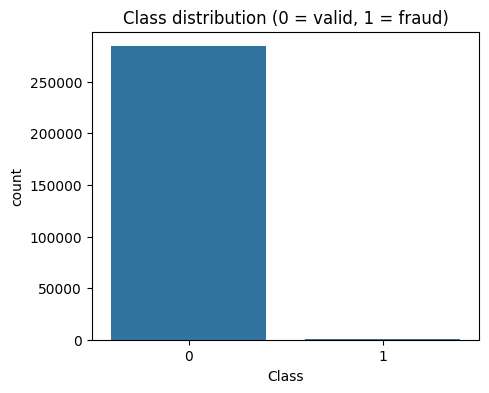

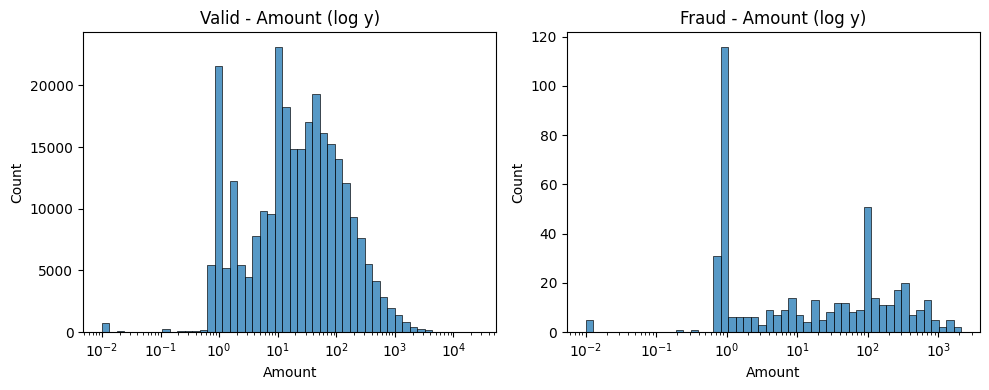

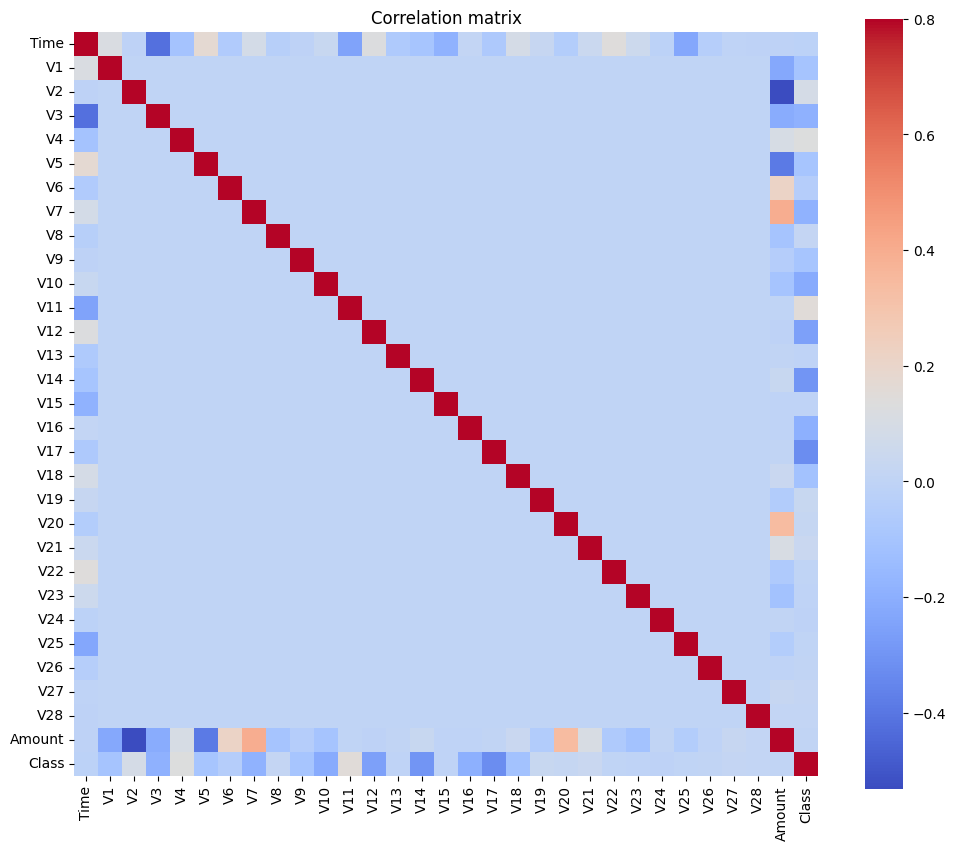

In [ ]:
# 6.1 class count
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=data)
plt.title('Class distribution (0 = valid, 1 = fraud)')
plt.show()

# 6.2 Amount distributions for fraud vs valid
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(data[data['Class']==0]['Amount'], bins=50, log_scale=(True,False))
plt.title('Valid - Amount (log y)')

plt.subplot(1,2,2)
sns.histplot(data[data['Class']==1]['Amount'], bins=50, log_scale=(True,False))
plt.title('Fraud - Amount (log y)')
plt.tight_layout()
plt.show()

# 6.3 Correlation heatmap (full matrix might be dense)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), vmax=0.8, square=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [ ]:
# Create scaled versions of Amount and Time
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Scaled_Time']   = scaler.fit_transform(data['Time'].values.reshape(-1,1))

# Drop original Amount and Time
data_processed = data.drop(['Time','Amount'], axis=1)

# Sanity check
data_processed.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
X = data_processed.drop('Class', axis=1)
y = data_processed['Class']

xTrain, xTest, yTrain, yTest = train_test_split(X.values, y.values, test_size=0.20, random_state=42, stratify=y)
print("Train shape:", xTrain.shape, "Test shape:", xTest.shape)


Train shape: (227845, 30) Test shape: (56962, 30)


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)
yProb = rfc.predict_proba(xTest)[:,1]   # for ROC-AUC


Accuracy: 0.999596
Precision: 0.941176
Recall: 0.816327
F1: 0.874317
MCC: 0.876337
ROC AUC: 0.952793

Classification report:
               precision    recall  f1-score   support

           0   0.999684  0.999912  0.999798     56864
           1   0.941176  0.816327  0.874317        98

    accuracy                       0.999596     56962
   macro avg   0.970430  0.908119  0.937057     56962
weighted avg   0.999583  0.999596  0.999582     56962



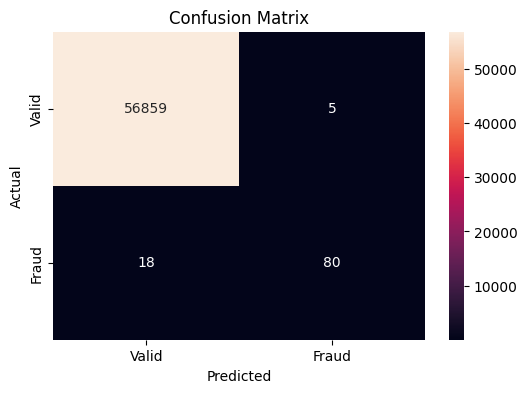

Precision-Recall AUC: 0.864660


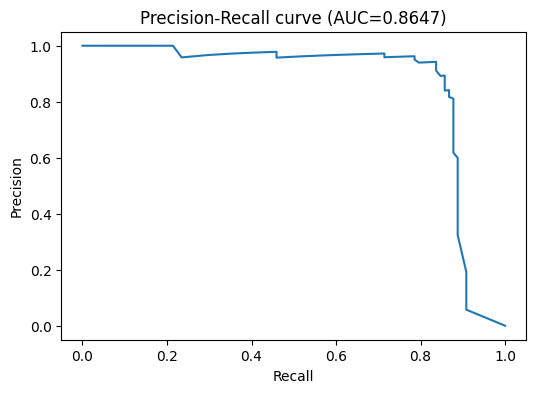

In [ ]:
accuracy  = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred, zero_division=0)
recall    = recall_score(yTest, yPred, zero_division=0)
f1        = f1_score(yTest, yPred, zero_division=0)
mcc       = matthews_corrcoef(yTest, yPred)
roc_auc   = roc_auc_score(yTest, yProb)

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1: {:.6f}".format(f1))
print("MCC: {:.6f}".format(mcc))
print("ROC AUC: {:.6f}".format(roc_auc))
print("\nClassification report:\n", classification_report(yTest, yPred, digits=6))

# Confusion matrix heatmap
cm = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Valid','Fraud'], yticklabels=['Valid','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall curve & PR-AUC
precision_vals, recall_vals, _ = precision_recall_curve(yTest, yProb)
pr_auc = auc(recall_vals, precision_vals)
print("Precision-Recall AUC: {:.6f}".format(pr_auc))
plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (AUC={:.4f})'.format(pr_auc))
plt.show()


In [20]:
rfc_bal = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rfc_bal.fit(xTrain, yTrain)
yPred_bal = rfc_bal.predict(xTest)
print("Balanced RF recall:", recall_score(yTest, yPred_bal))


Balanced RF recall: 0.7551020408163265


In [ ]:
joblib.dump(rfc, "/content/rfc_credit_fraud_model.joblib")


In [ ]:
# predict on the first test sample
sample = xTest[0].reshape(1, -1)
pred_label = rfc.predict(sample)[0]
pred_prob  = rfc.predict_proba(sample)[0][1]
print("Predicted label:", pred_label, "Fraud probability:", pred_prob)
